In [1]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import roc_auc_score

C:\Users\shekaul\AppData\Local\Continuum\anaconda3\envs\coursera\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


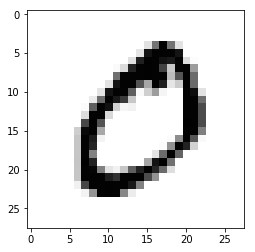

In [2]:
from preprocessed_mnist import load_dataset
X_train, y_train, X_val, y_val, X_test, y_test = load_dataset()
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(X_train[1], cmap="Greys");

loss at iter 0:2.3026
train auc: 0.44730002340899633
test auc: 0.4467774848644285
loss at iter 1000:2.2951
train auc: 0.6089822000160476
test auc: 0.610169418820387
loss at iter 2000:2.2698
train auc: 0.6074894793538733
test auc: 0.6085945832985046
loss at iter 3000:2.2447
train auc: 0.6539080425195388
test auc: 0.6583971399290627
loss at iter 4000:2.2117
train auc: 0.7226521486344961
test auc: 0.73142039145487
loss at iter 5000:2.1221
train auc: 0.7790881210625982
test auc: 0.7825589480484805
loss at iter 6000:2.0866
train auc: 0.8191352541400787
test auc: 0.8227525502450478
loss at iter 7000:2.0255
train auc: 0.8781224636233617
test auc: 0.8816085103105508
loss at iter 8000:1.9260
train auc: 0.9010915573932268
test auc: 0.9044710772788559
loss at iter 9000:1.8385
train auc: 0.9283905000246196
test auc: 0.9315221697821144
loss at iter 10000:1.7704
train auc: 0.9533759033322042
test auc: 0.9550638835867954
loss at iter 11000:1.7143
train auc: 0.9636509898423083
test auc: 0.964690111132

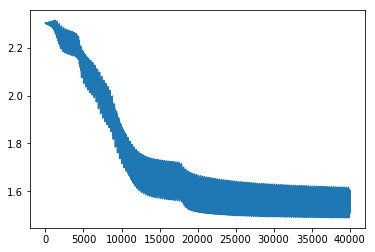

In [3]:
X_train_reshape = X_train.reshape((50000, 784))
X_test_reshape = X_test.reshape((10000, 784))

y_train_reshape = np.zeros((y_train.size, 10))
y_train_reshape[np.arange(y_train.size),y_train] = 1
y_test_reshape = np.zeros((y_test.size, 10))
y_test_reshape[np.arange(y_test.size),y_test] = 1

# Variable Init
input_x = tf.placeholder('float32', shape=[None,784])
input_y = tf.placeholder('float32', shape=[None, 10])
weights_1 = tf.Variable(tf.truncated_normal(shape=(784, 50), mean=0.0, stddev=0.001), dtype='float32')
weights_2 = tf.Variable(tf.truncated_normal(shape=(50,10), mean=0.0, stddev=0.001), dtype='float32')
bias_1 = tf.Variable(tf.ones(shape=(1,50)),dtype='float32')
bias_2 = tf.Variable(tf.ones(shape=(1,10)),dtype='float32')

# Model Code
hidden_layer_1 = tf.nn.relu(tf.add(tf.matmul(input_x,weights_1), bias_1))
predicted_y = tf.nn.softmax(tf.add(tf.matmul(hidden_layer_1,weights_2), bias_2))
loss = tf.losses.softmax_cross_entropy(input_y, predicted_y)
accuracy = tf.metrics.accuracy(tf.argmax(input_y, 1), tf.argmax(predicted_y, 1))
optimizer = tf.train.MomentumOptimizer(0.01, 0.5).minimize(loss, var_list=[weights_1,bias_1,weights_2,bias_2])

# Training
import matplotlib.pyplot as plt
sess = tf.Session()
sess.run(tf.global_variables_initializer())
sess.run(tf.local_variables_initializer())
mini_batch_size = 180
n_batch = 50000 // mini_batch_size + (50000 % mini_batch_size != 0)
lossdata = []
predictiondata = []
accuracydata = []
iters = []
for i in range(40000):
    i_batch = (i % n_batch)*mini_batch_size
    sess.run(optimizer, {input_x: X_train_reshape[i_batch:i_batch+mini_batch_size], input_y: y_train_reshape[i_batch:i_batch+mini_batch_size]})
    loss_i = sess.run(loss, {input_x: X_train_reshape[i_batch:i_batch+mini_batch_size], input_y: y_train_reshape[i_batch:i_batch+mini_batch_size]})
    lossdata.append(loss_i)
    iters.append(i)
    if i % 1000 == 0:
        print("loss at iter %i:%.4f" % (i, loss_i))
        print("train auc:", roc_auc_score(y_train_reshape, sess.run(predicted_y, {input_x:X_train_reshape})))
        print("test auc:", roc_auc_score(y_test_reshape, sess.run(predicted_y, {input_x:X_test_reshape})))
plt.plot(iters, lossdata)
plt.show()

In [9]:
test_loss = sess.run(loss, {input_x:X_test_reshape, input_y:y_test_reshape})
test_accuracy = sess.run(accuracy, {input_x:X_test_reshape, input_y:y_test_reshape})
print(test_loss)
print(test_accuracy)
#print('Test Set Loss: {0:.2f} and accuracy: {1:0.2f}%'.format(test_loss, test_accuracy*100))

1.5457807
(0.9237, 0.9237)
